# OFFENSES NEW YORK 

[dataset NY](https://www.kaggle.com/adamschroeder/crimes-new-york-city?select=Crime_Column_Description.csv)

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# importando os dados referentes aos delitos em nova york
ny  = pd.read_csv('NYPD_Complaint_Data_Historic.csv')

C:\Users\Biena\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
ny.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"


# Criando um novo DataFrame "select_ny"


 - Criando uma cópia do DataFrame ny

In [6]:
ny_datetime = ny.copy()

#### Convertendo as colunas para formato datetime

In [7]:
ny_datetime["CMPLNT_FR_DT"] = pd.to_datetime(ny_datetime["CMPLNT_FR_DT"], errors = 'coerce')

In [8]:
ny_datetime['CMPLNT_FR_TM'] = pd.to_datetime(ny_datetime['CMPLNT_FR_TM'], errors = 'coerce')

In [9]:
ny_datetime['CMPLNT_TO_DT'] = pd.to_datetime(ny_datetime['CMPLNT_TO_DT'], errors = 'coerce')

In [10]:
ny_datetime['CMPLNT_TO_TM'] = pd.to_datetime(ny_datetime['CMPLNT_TO_TM'], errors = 'coerce')

In [11]:
ny_datetime['RPT_DT'] = pd.to_datetime(ny_datetime['RPT_DT'], errors = 'coerce')

## Criando uma nova coluna "duracao_da_ocorrencia"

### ny['duracao_da_ocorrencia']

In [12]:
 ny_datetime['duracao_da_ocorrencia'] = ny_datetime['CMPLNT_TO_TM'] - ny_datetime['CMPLNT_FR_TM']

In [13]:
ny_datetime.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,duracao_da_ocorrencia
0,101109527,2015-12-31,2020-11-17 23:45:00,NaT,NaT,2015-12-31,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)",NaT
1,153401121,2015-12-31,2020-11-17 23:36:00,NaT,NaT,2015-12-31,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)",NaT
2,569369778,2015-12-31,2020-11-17 23:30:00,NaT,NaT,2015-12-31,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)",NaT
3,968417082,2015-12-31,2020-11-17 23:30:00,NaT,NaT,2015-12-31,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)",NaT
4,641637920,2015-12-31,2020-11-17 23:25:00,2015-12-31,2020-11-17 23:30:00,2015-12-31,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)",00:05:00


## Selecionando colunas do DataFrame "ny_datetime"

Utilizamos o DataFrame "ny_datetime" , que ja tem as colunas convertidas para o padrão datetime.

Por meio do metodo iloc ,selecinamos as colunas que tem informações úteis, relacionadas aos delitos praticados.

 

In [14]:
select_ny = ny_datetime.iloc[:, [1,2,3,4,5,7,10,11,12,13,15,16,24]]

## Renomeando as colunas do DataFrame select_ny

In [15]:
select_ny.columns = ['data_da_ocorrencia','hora_da_ocorrencia','data_final_da_ocorrencia', 
                     'hora_termino_da_ocorrencia','data_comunicacao_policia',
                     'descricao_da_ofensa','conclusao','nivel_de_ofensa','jurisdicao','bairro','local_da_ocorrencia'
                    ,'descricao_das_intalacoes','duracao_da_ocorrencia']

In [16]:
select_ny.head()

,data_da_ocorrencia,hora_da_ocorrencia,data_final_da_ocorrencia,hora_termino_da_ocorrencia,data_comunicacao_policia,descricao_da_ofensa,conclusao,nivel_de_ofensa,jurisdicao,bairro,local_da_ocorrencia,descricao_das_intalacoes,duracao_da_ocorrencia
0,2015-12-31,2020-11-17 23:45:00,NaT,NaT,2015-12-31,FORGERY,COMPLETED,FELONY,N.Y. POLICE DEPT,BRONX,INSIDE,BAR/NIGHT CLUB,NaT
1,2015-12-31,2020-11-17 23:36:00,NaT,NaT,2015-12-31,MURDER & NON-NEGL. MANSLAUGHTER,COMPLETED,FELONY,N.Y. POLICE DEPT,QUEENS,OUTSIDE,NaN,NaT
2,2015-12-31,2020-11-17 23:30:00,NaT,NaT,2015-12-31,DANGEROUS DRUGS,COMPLETED,FELONY,N.Y. POLICE DEPT,MANHATTAN,NaN,OTHER,NaT
3,2015-12-31,2020-11-17 23:30:00,NaT,NaT,2015-12-31,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,QUEENS,INSIDE,RESIDENCE-HOUSE,NaT
4,2015-12-31,2020-11-17 23:25:00,2015-12-31,2020-11-17 23:30:00,2015-12-31,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,FRONT OF,OTHER,00:05:00


 - Corrigindo os dados das colunas datetime

In [17]:
select_ny = select_ny.copy()

In [18]:
select_ny['hora_da_ocorrencia'] = select_ny['hora_da_ocorrencia'].dt.strftime('%H:%M:%S')

In [19]:
select_ny['hora_termino_da_ocorrencia'] = select_ny['hora_termino_da_ocorrencia'].dt.strftime('%H:%M:%S')

In [20]:
select_ny.head()

,data_da_ocorrencia,hora_da_ocorrencia,data_final_da_ocorrencia,hora_termino_da_ocorrencia,data_comunicacao_policia,descricao_da_ofensa,conclusao,nivel_de_ofensa,jurisdicao,bairro,local_da_ocorrencia,descricao_das_intalacoes,duracao_da_ocorrencia
0,2015-12-31,23:45:00,NaT,NaN,2015-12-31,FORGERY,COMPLETED,FELONY,N.Y. POLICE DEPT,BRONX,INSIDE,BAR/NIGHT CLUB,NaT
1,2015-12-31,23:36:00,NaT,NaN,2015-12-31,MURDER & NON-NEGL. MANSLAUGHTER,COMPLETED,FELONY,N.Y. POLICE DEPT,QUEENS,OUTSIDE,NaN,NaT
2,2015-12-31,23:30:00,NaT,NaN,2015-12-31,DANGEROUS DRUGS,COMPLETED,FELONY,N.Y. POLICE DEPT,MANHATTAN,NaN,OTHER,NaT
3,2015-12-31,23:30:00,NaT,NaN,2015-12-31,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,QUEENS,INSIDE,RESIDENCE-HOUSE,NaT
4,2015-12-31,23:25:00,2015-12-31,23:30:00,2015-12-31,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,FRONT OF,OTHER,00:05:00


### Alterando dados do DataFrame "select_ny"

In [21]:
select_ny = select_ny.copy()

In [22]:
# alterando os dados de  select_ny['conclusao']
new_conclusao = {'ATTEMPTED': 'nao_concluido', 'COMPLETED': 'concluido' }
select_ny['conclusao'] = select_ny['conclusao'].map(new_conclusao)

# alterando os dados de  select_ny['nivel_de_ofensa']
new_nivel_de_ofensa = {'MISDEMEANOR': "contravencao", 'FELONY': "crime", 'VIOLATION': "violacao" }
select_ny['nivel_de_ofensa'] = select_ny['nivel_de_ofensa'].map(new_nivel_de_ofensa)


# alterando os dados de  select_ny['local_da_ocorrencia']
new_local_da_ocorrencia = {'INSIDE': "dentro", 'FRONT OF': "em_frente", 'OPPOSITE OF': "oposto", 
                           'REAR OF': "atras", 'OUTSIDE': "fora" }
select_ny['local_da_ocorrencia'] = select_ny['local_da_ocorrencia'].map(new_local_da_ocorrencia)

### Reordenando as colunas do DataFrame

In [23]:
select_ny = select_ny[['data_da_ocorrencia', 'data_final_da_ocorrencia', 'data_comunicacao_policia','hora_da_ocorrencia',
                       'hora_termino_da_ocorrencia', 'duracao_da_ocorrencia','descricao_da_ofensa',
                       'conclusao', 'nivel_de_ofensa', 'jurisdicao','bairro', 'local_da_ocorrencia', 'descricao_das_intalacoes']]

select_ny.head()

,data_da_ocorrencia,data_final_da_ocorrencia,data_comunicacao_policia,hora_da_ocorrencia,hora_termino_da_ocorrencia,duracao_da_ocorrencia,descricao_da_ofensa,conclusao,nivel_de_ofensa,jurisdicao,bairro,local_da_ocorrencia,descricao_das_intalacoes
0,2015-12-31,NaT,2015-12-31,23:45:00,NaN,NaT,FORGERY,concluido,crime,N.Y. POLICE DEPT,BRONX,dentro,BAR/NIGHT CLUB
1,2015-12-31,NaT,2015-12-31,23:36:00,NaN,NaT,MURDER & NON-NEGL. MANSLAUGHTER,concluido,crime,N.Y. POLICE DEPT,QUEENS,fora,NaN
2,2015-12-31,NaT,2015-12-31,23:30:00,NaN,NaT,DANGEROUS DRUGS,concluido,crime,N.Y. POLICE DEPT,MANHATTAN,NaN,OTHER
3,2015-12-31,NaT,2015-12-31,23:30:00,NaN,NaT,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,QUEENS,dentro,RESIDENCE-HOUSE
4,2015-12-31,2015-12-31,2015-12-31,23:25:00,23:30:00,00:05:00,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,MANHATTAN,em_frente,OTHER


# Tratando os dados e excluindo valores nulos

 - Aqui os dados nulos serão analisados se podem ser excluidos sem haver perdas grandes com relação as informações passadas .

In [24]:
select_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column                      Non-Null Count    Dtype          
---  ------                      --------------    -----          
 0   data_da_ocorrencia          1048503 non-null  datetime64[ns] 
 1   data_final_da_ocorrencia    842616 non-null   datetime64[ns] 
 2   data_comunicacao_policia    1048575 non-null  datetime64[ns] 
 3   hora_da_ocorrencia          1048575 non-null  object         
 4   hora_termino_da_ocorrencia  843002 non-null   object         
 5   duracao_da_ocorrencia       843002 non-null   timedelta64[ns]
 6   descricao_da_ofensa         1045695 non-null  object         
 7   conclusao                   1048574 non-null  object         
 8   nivel_de_ofensa             1048575 non-null  object         
 9   jurisdicao                  1048575 non-null  object         
 10  bairro                      1048575 non-null  object         
 11  local_da_oc

 - verificando os valores nulos coluna por coluna

In [25]:
select_ny.data_da_ocorrencia.isnull().value_counts()

False    1048503
True          72
Name: data_da_ocorrencia, dtype: int64

# Gerando algumas vizualizações de select_ny 

# Quantidade de delitos cometidos por bairros
 
 - Delitos_concluidos_por_bairros será o dataframe a ser utilizado neste tópico
 - Selecionando apenas os delitos concluídos

In [26]:
delitos_concluidos_por_bairros = select_ny.query('conclusao == "concluido"')

 - Criando o DataFrame delitos_concluidos_por_bairros

In [27]:
delitos_concluidos_por_bairros_df = delitos_concluidos_por_bairros.bairro.value_counts()
delitos_concluidos_por_bairros_df = delitos_concluidos_por_bairros_df.to_frame().reset_index()
delitos_concluidos_por_bairros_df.columns = ['bairro' , 'delitos_concluidos']
delitos_concluidos_por_bairros_df

,bairro,delitos_concluidos
0,BROOKLYN,309645
1,MANHATTAN,240259
2,BRONX,223833
3,QUEENS,208015
4,STATEN ISLAND,48064


- Visualizando a quantidade de delitos em cada bairro

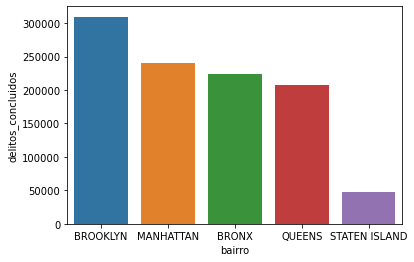

In [28]:
sns.barplot(x = 'bairro' , y = 'delitos_concluidos' , data = delitos_concluidos_por_bairros_df)

# Visualizando o comportamento dos delitos ao longo dos anos 

 - verificando a quantidade de registros por ano

In [29]:
select_ny['data_da_ocorrencia'].dt.year.value_counts().head()

2014.0    490363
2015.0    468576
2013.0     86162
2012.0      1229
2011.0       578
Name: data_da_ocorrencia, dtype: int64

 - Delitos do ano de 2013

In [30]:
delitos_2013 = select_ny.query('data_da_ocorrencia >= "2013-1-1" and data_da_ocorrencia < "2014-1-1"')

 - Delitos do ano de 2014

In [31]:
delitos_2014 = select_ny.query('data_da_ocorrencia >= "2014-1-1" and data_da_ocorrencia < "2015-1-1"')

 - Delitos do ano de 2015

In [32]:
delitos_2015 = select_ny.query('data_da_ocorrencia >= "2015-1-1" and data_da_ocorrencia < "2016-1-1"')

## Descrição da ofensa - Tipos de delitos mais comuns

In [33]:
tipos_de_delitos = delitos_concluidos_por_bairros.descricao_da_ofensa.value_counts().to_frame().reset_index()
tipos_de_delitos.columns = ['descricao_da_ofensa' , 'quantidade']

In [70]:
principais_delitos = tipos_de_delitos.head()
principais_delitos

,descricao_da_ofensa,quantidade
0,PETIT LARCENY,177689
1,HARRASSMENT 2,132854
2,ASSAULT 3 & RELATED OFFENSES,113732
3,CRIMINAL MISCHIEF & RELATED OF,102419
4,GRAND LARCENY,94360


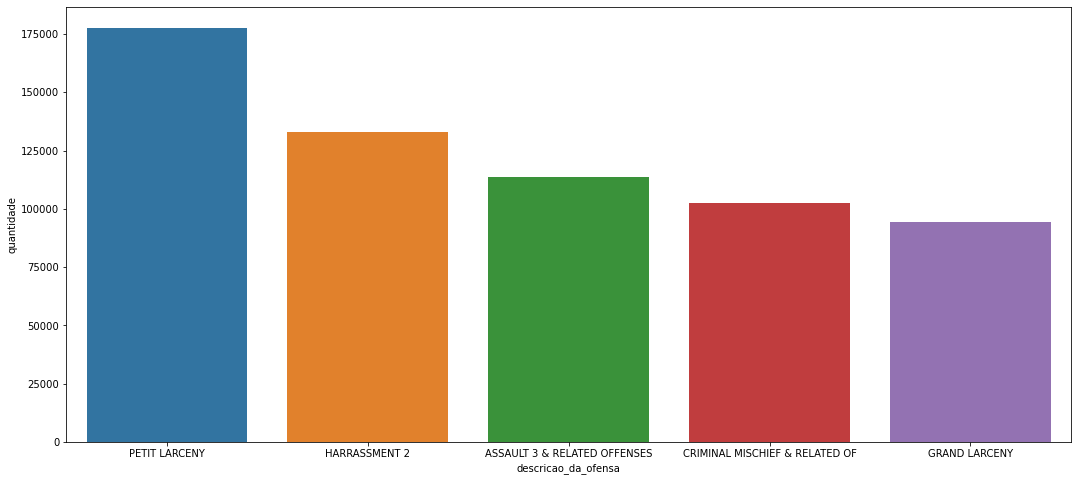

In [76]:
plt.figure(figsize=(18,8))
sns.barplot(x = 'descricao_da_ofensa' , y = 'quantidade' , data = principais_delitos)

## Nivel  de ofensa  dos delitos mais comuns
relacionar os tipos de delitos mais comuns com o nivel de ofensa 

In [ ]:
# separar crime e a descrição dos crimes 
# separar contravenção e ver a descrição da contravencção
# separar violação e ver a descrição da violação

## Detalhando os crimes 

In [78]:
crimes_df = delitos_concluidos_por_bairros.query('nivel_de_ofensa == "crime"').descricao_da_ofensa.value_counts()
crimes_df = crimes_df.to_frame().reset_index()
crimes_df.columns = ['tipo_crimes','quantidade']
crimes_df.head()

,tipo_crimes,quantidade
0,GRAND LARCENY,94360
1,FELONY ASSAULT,41566
2,ROBBERY,32620
3,BURGLARY,32229
4,MISCELLANEOUS PENAL LAW,27218


## Detalhando as contravenções 

In [79]:
contravencoes_df = delitos_concluidos_por_bairros.query('nivel_de_ofensa == "contravencao"').descricao_da_ofensa.value_counts()
contravencoes_df = contravencoes_df.to_frame().reset_index()
contravencoes_df.columns = ['tipo_contravencao','quantidade']
contravencoes_df.head()

,tipo_contravencao,quantidade
0,PETIT LARCENY,177689
1,ASSAULT 3 & RELATED OFFENSES,113732
2,CRIMINAL MISCHIEF & RELATED OF,83476
3,DANGEROUS DRUGS,46976
4,OFF. AGNST PUB ORD SENSBLTY &,44641


## Detalhando as violações

In [80]:
violacoes_df = delitos_concluidos_por_bairros.query('nivel_de_ofensa == "violacao"').descricao_da_ofensa.value_counts()
violacoes_df = violacoes_df.to_frame().reset_index()
violacoes_df.columns = ['tipo_violacao','quantidade']
violacoes_df.head()

,tipo_violacao,quantidade
0,HARRASSMENT 2,132854
1,MISCELLANEOUS PENAL LAW,1716
2,ADMINISTRATIVE CODE,184
3,DISORDERLY CONDUCT,121
4,OTHER STATE LAWS,31


# Relação entre o  horario e os tipos de delitos 

## Delitos particados durante dia  

In [84]:
delitos_dia = delitos_concluidos_por_bairros.query(' hora_da_ocorrencia >= "06:00:00" and hora_da_ocorrencia < "18:00:00" ')

In [117]:
tipos_de_ofensa_dia = delitos_dia.nivel_de_ofensa.value_counts().to_frame().reset_index()
tipos_de_ofensa_dia.columns = ['ofensa' , 'quantidade']
tipos_de_ofensa_dia

,ofensa,quantidade
0,contravencao,292288
1,crime,158992
2,violacao,79316


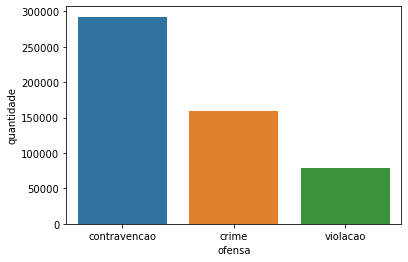

In [118]:
sns.barplot(x = 'ofensa' , y = 'quantidade' , data =tipos_de_ofensa_dia)

In [119]:
delitos_dia.head()

,data_da_ocorrencia,data_final_da_ocorrencia,data_comunicacao_policia,hora_da_ocorrencia,hora_termino_da_ocorrencia,duracao_da_ocorrencia,descricao_da_ofensa,conclusao,nivel_de_ofensa,jurisdicao,bairro,local_da_ocorrencia,descricao_das_intalacoes
21,2015-04-06,2015-04-10,2015-12-21,12:00:00,18:00:00,06:00:00,RAPE,concluido,crime,N.Y. POLICE DEPT,QUEENS,dentro,OTHER
126,2013-06-26,2013-09-09,2015-12-14,15:00:00,07:00:00,-1 days +16:00:00,SEX CRIMES,concluido,crime,N.Y. POLICE DEPT,BROOKLYN,dentro,RESIDENCE-HOUSE
147,2015-12-31,NaT,2015-12-31,12:35:00,NaN,NaT,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,QUEENS,NaN,GAS STATION
189,2015-12-31,NaT,2015-12-31,16:30:00,NaN,NaT,GRAND LARCENY,concluido,crime,N.Y. POLICE DEPT,BROOKLYN,dentro,DRY CLEANER/LAUNDRY
192,2015-12-31,2015-12-31,2015-12-31,17:57:00,18:13:00,00:16:00,VEHICLE AND TRAFFIC LAWS,concluido,contravencao,N.Y. POLICE DEPT,MANHATTAN,NaN,STREET


### Descrição dos delitos praticdos durante o dia  em cada bairro

 - BROOKLYN

In [148]:
delitos_brooklyn_dia = delitos_dia.query(' bairro == "BROOKLYN"')

In [143]:
crimes_brooklyn_dia.descricao_da_ofensa.value_counts().head()

PETIT LARCENY                     29781
HARRASSMENT 2                     24654
ASSAULT 3 & RELATED OFFENSES      15957
GRAND LARCENY                     15620
CRIMINAL MISCHIEF & RELATED OF    13813
Name: descricao_da_ofensa, dtype: int64

 - MANHATTAN

In [153]:
delitos_manhattan_dia = delitos_dia.query('bairro == "MANHATTAN"')

In [154]:
delitos_manhattan_dia.descricao_da_ofensa.value_counts().head()

PETIT LARCENY                     33805
GRAND LARCENY                     19894
HARRASSMENT 2                     15709
CRIMINAL MISCHIEF & RELATED OF     9220
ASSAULT 3 & RELATED OFFENSES       8962
Name: descricao_da_ofensa, dtype: int64

  - BRONX

In [161]:
delitos_bronx_dia = delitos_dia.query('bairro == "BRONX"')

In [162]:
delitos_bronx_dia.descricao_da_ofensa.value_counts().head()

PETIT LARCENY                     19539
HARRASSMENT 2                     16832
ASSAULT 3 & RELATED OFFENSES      13261
CRIMINAL MISCHIEF & RELATED OF     9722
DANGEROUS DRUGS                    8906
Name: descricao_da_ofensa, dtype: int64

 - QUEENS

In [163]:
delitos_queens_dia = delitos_dia.query('bairro == "QUEENS"')

In [164]:
delitos_queens_dia.descricao_da_ofensa.value_counts().head()

PETIT LARCENY                     20569
HARRASSMENT 2                     15782
GRAND LARCENY                     10529
CRIMINAL MISCHIEF & RELATED OF     9834
ASSAULT 3 & RELATED OFFENSES       9740
Name: descricao_da_ofensa, dtype: int64

 - STATEN ISLAND

In [165]:
delitos_statenisland_dia = delitos_dia.query('bairro == "STATEN ISLAND"')

In [166]:
delitos_statenisland_dia.descricao_da_ofensa.value_counts().head()

HARRASSMENT 2                     5393
PETIT LARCENY                     4782
CRIMINAL MISCHIEF & RELATED OF    2874
ASSAULT 3 & RELATED OFFENSES      2312
OFF. AGNST PUB ORD SENSBLTY &     1984
Name: descricao_da_ofensa, dtype: int64

## Delitos particados durante a noite 

In [107]:
delitos_noite = delitos_concluidos_por_bairros.query(' hora_da_ocorrencia >= "18:00:00" and hora_da_ocorrencia < "6:00:00" ')

In [109]:
delitos_noite.head()

,data_da_ocorrencia,data_final_da_ocorrencia,data_comunicacao_policia,hora_da_ocorrencia,hora_termino_da_ocorrencia,duracao_da_ocorrencia,descricao_da_ofensa,conclusao,nivel_de_ofensa,jurisdicao,bairro,local_da_ocorrencia,descricao_das_intalacoes
0,2015-12-31,NaT,2015-12-31,23:45:00,NaN,NaT,FORGERY,concluido,crime,N.Y. POLICE DEPT,BRONX,dentro,BAR/NIGHT CLUB
1,2015-12-31,NaT,2015-12-31,23:36:00,NaN,NaT,MURDER & NON-NEGL. MANSLAUGHTER,concluido,crime,N.Y. POLICE DEPT,QUEENS,fora,NaN
2,2015-12-31,NaT,2015-12-31,23:30:00,NaN,NaT,DANGEROUS DRUGS,concluido,crime,N.Y. POLICE DEPT,MANHATTAN,NaN,OTHER
3,2015-12-31,NaT,2015-12-31,23:30:00,NaN,NaT,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,QUEENS,dentro,RESIDENCE-HOUSE
4,2015-12-31,2015-12-31,2015-12-31,23:25:00,23:30:00,00:05:00,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,MANHATTAN,em_frente,OTHER


In [114]:
tipos_de_ofensa_noite = delitos_noite.nivel_de_ofensa.value_counts().to_frame().reset_index()
tipos_de_ofensa_noite.columns = ['ofensa' , 'quantidade']
tipos_de_ofensa_noite

,ofensa,quantidade
0,contravencao,187638
1,crime,95349
2,violacao,41271


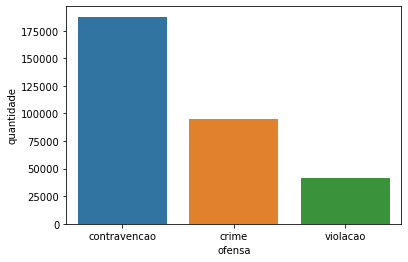

In [116]:
sns.barplot(x = 'ofensa' , y = 'quantidade' ,data =  tipos_de_ofensa_noite)

### Descrição dos delitos praticados a noite em cada bairro

 - BROOKLYN

In [167]:
delitos_brooklyn_noite = delitos_noite.query(' bairro == "BROOKLYN"')

In [168]:
delitos_brooklyn_noite.descricao_da_ofensa.value_counts().head()

PETIT LARCENY                     14979
HARRASSMENT 2                     13024
ASSAULT 3 & RELATED OFFENSES      12123
CRIMINAL MISCHIEF & RELATED OF    10907
DANGEROUS DRUGS                    7704
Name: descricao_da_ofensa, dtype: int64

 - MANHATTAN

In [169]:
delitos_manhattan_noite = delitos_noite.query(' bairro == "MANHATTAN"')

In [170]:
delitos_manhattan_noite.descricao_da_ofensa.value_counts().head()

PETIT LARCENY                     15126
GRAND LARCENY                      9252
HARRASSMENT 2                      7483
ASSAULT 3 & RELATED OFFENSES       6552
CRIMINAL MISCHIEF & RELATED OF     6423
Name: descricao_da_ofensa, dtype: int64

 - BRONX

In [171]:
delitos_bronx_noite = delitos_noite.query(' bairro == "BRONX"')

In [173]:
delitos_bronx_noite.descricao_da_ofensa.value_counts().head()

PETIT LARCENY                     9815
ASSAULT 3 & RELATED OFFENSES      9670
DANGEROUS DRUGS                   9641
HARRASSMENT 2                     8260
CRIMINAL MISCHIEF & RELATED OF    7791
Name: descricao_da_ofensa, dtype: int64

 - QUEENS

In [174]:
delitos_queens_noite = delitos_noite.query(' bairro == "QUEENS"')

In [177]:
delitos_queens_noite.descricao_da_ofensa.value_counts().head()

PETIT LARCENY                     10646
HARRASSMENT 2                      8769
CRIMINAL MISCHIEF & RELATED OF     8086
ASSAULT 3 & RELATED OFFENSES       7786
GRAND LARCENY                      4680
Name: descricao_da_ofensa, dtype: int64

 - STATEN ISLAND

In [178]:
delitos_statenisland_noite = delitos_noite.query(' bairro == "STATEN ISLAND"')

In [179]:
delitos_statenisland_noite.descricao_da_ofensa.value_counts().head()

HARRASSMENT 2                     3030
PETIT LARCENY                     2198
CRIMINAL MISCHIEF & RELATED OF    2068
ASSAULT 3 & RELATED OFFENSES      1660
OFF. AGNST PUB ORD SENSBLTY &      908
Name: descricao_da_ofensa, dtype: int64

## Visualizando qual a classificação dos delitos e suas quantiades

In [198]:
nivel_de_ofensa = select_ny.query('conclusao == "concluido" ')
nivel_de_ofensa_df = nivel_de_ofensa.nivel_de_ofensa.value_counts()
nivel_de_ofensa_df = nivel_de_ofensa_df.to_frame().reset_index()
nivel_de_ofensa_df.columns = ['ofensa' , 'quantidade']
nivel_de_ofensa_df
# visualizando os tipos de delitos e suas quantidades

,ofensa,quantidade
0,contravencao,580281
1,crime,314579
2,violacao,134956


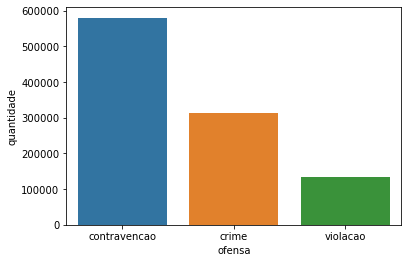

In [199]:
sns.barplot(x = 'ofensa' , y = 'quantidade' , data = nivel_de_ofensa_df)

### Distribuição dos tipos de ofensa por  bairros

 -  BROOKLYN

In [200]:
brooklyn = nivel_de_ofensa.query('bairro == "BROOKLYN" ')
brooklyn_df = brooklyn.nivel_de_ofensa.value_counts().to_frame().reset_index()
brooklyn_df.columns = ['ofensa' , 'quantidade']
brooklyn_df

,ofensa,quantidade
0,contravencao,166048
1,crime,101013
2,violacao,42584


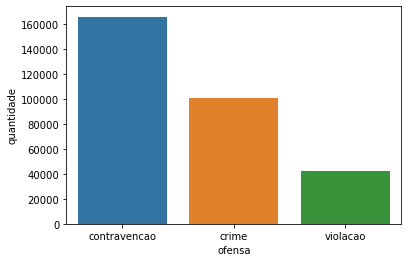

In [201]:
sns.barplot(x = 'ofensa' , y = 'quantidade' , data = brooklyn_df)

 -  MANHATTAN

In [202]:
manhattan = nivel_de_ofensa.query('bairro == "MANHATTAN" ')
manhattan_df = manhattan.nivel_de_ofensa.value_counts().to_frame().reset_index()
manhattan_df.columns = ['ofensa' , 'quantidade']
manhattan_df

,ofensa,quantidade
0,contravencao,139701
1,crime,73723
2,violacao,26835


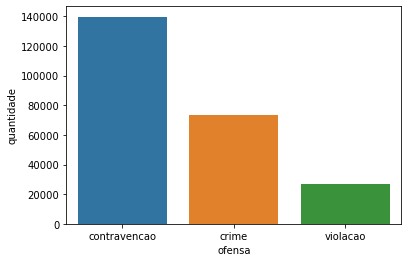

In [203]:
sns.barplot(x = 'ofensa' , y = 'quantidade' , data = manhattan_df)

 - BRONX

In [204]:
bronx = nivel_de_ofensa.query('bairro == "BRONX" ')
bronx_df = bronx.nivel_de_ofensa.value_counts().to_frame().reset_index()
bronx_df.columns = ['ofensa' , 'quantidade']
bronx_df

,ofensa,quantidade
0,contravencao,134965
1,crime,60656
2,violacao,28212


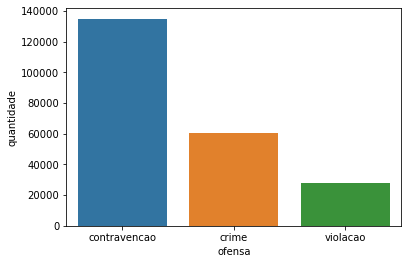

In [205]:
sns.barplot(x = 'ofensa' , y = 'quantidade' , data = bronx_df)

 - QUEENS

In [206]:
queens = nivel_de_ofensa.query('bairro == "QUEENS"')
queens_df = queens.nivel_de_ofensa.value_counts().to_frame().reset_index()
queens_df.columns = ['ofensa' , 'quantidade']
queens_df

,ofensa,quantidade
0,contravencao,111774
1,crime,68331
2,violacao,27910


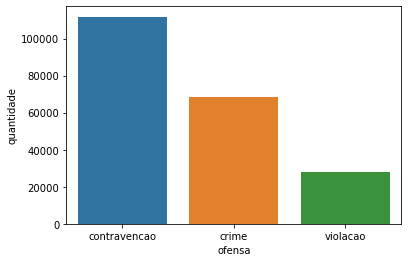

In [207]:
sns.barplot(x = 'ofensa' , y = 'quantidade' , data = queens_df)

 - STATEN ISLAND

In [208]:
staten_island = nivel_de_ofensa.query('bairro == "STATEN ISLAND"')
staten_island_df = staten_island.nivel_de_ofensa.value_counts().to_frame().reset_index()
staten_island_df.columns = ['ofensa' , 'quantidade']
staten_island_df

,ofensa,quantidade
0,contravencao,27793
1,crime,10856
2,violacao,9415


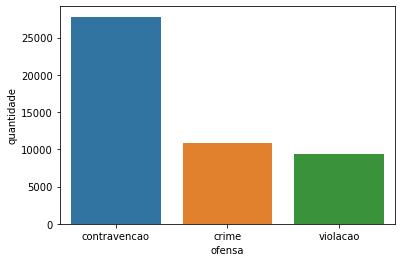

In [209]:
sns.barplot(x = 'ofensa' , y = 'quantidade' , data = staten_island_df)

## Departamentos responsáveis pelos delitos

In [182]:
dep_resp_delitos = delitos_concluidos_por_bairros[['jurisdicao','descricao_da_ofensa','nivel_de_ofensa','local_da_ocorrencia']]
dep_resp_delitos.head()

,jurisdicao,descricao_da_ofensa,nivel_de_ofensa,local_da_ocorrencia
0,N.Y. POLICE DEPT,FORGERY,crime,dentro
1,N.Y. POLICE DEPT,MURDER & NON-NEGL. MANSLAUGHTER,crime,fora
2,N.Y. POLICE DEPT,DANGEROUS DRUGS,crime,NaN
3,N.Y. POLICE DEPT,ASSAULT 3 & RELATED OFFENSES,contravencao,dentro
4,N.Y. POLICE DEPT,ASSAULT 3 & RELATED OFFENSES,contravencao,em_frente


 - jurisdição

In [185]:
jurisdicao_crimes = dep_resp_delitos.query('nivel_de_ofensa == "crime"')
jurisdicao_crimes.jurisdicao.value_counts().head()

N.Y. POLICE DEPT       279700
N.Y. HOUSING POLICE     19068
N.Y. TRANSIT POLICE     10456
DEPT OF CORRECTIONS      1788
OTHER                    1465
Name: jurisdicao, dtype: int64

In [186]:
jurisdicao_contravencao = dep_resp_delitos.query('nivel_de_ofensa == "contravencao"')
jurisdicao_contravencao.jurisdicao.value_counts().head()

N.Y. POLICE DEPT       514317
N.Y. HOUSING POLICE     46262
N.Y. TRANSIT POLICE     11612
PORT AUTHORITY           4120
OTHER                    1262
Name: jurisdicao, dtype: int64

In [187]:
jurisdicao_violacao = dep_resp_delitos.query('nivel_de_ofensa == "violacao" ')
jurisdicao_violacao.jurisdicao.value_counts().head()

N.Y. POLICE DEPT       119949
N.Y. HOUSING POLICE     13072
N.Y. TRANSIT POLICE      1685
N.Y. STATE POLICE          49
OTHER                      46
Name: jurisdicao, dtype: int64

## Classificação dos delitos quanto ao local da ocorrencia 

 - Neste tópico , podemos separar o local onde ocorreu o delito , se dentro ou fora do estabelecimento em questão 

In [188]:
# total de delitos concluidos 
total_registros = len(delitos_concluidos_por_bairros.local_da_ocorrencia)
total_registros

1029816

In [189]:
# delitos que aconteceram na parte de dentro dos estabelecimentos
total_delitos_local_da_ocorrencia = delitos_concluidos_por_bairros.query('local_da_ocorrencia == "dentro" ')
total_delitos_dentro = sum(total_delitos_local_da_ocorrencia.local_da_ocorrencia.value_counts())
total_delitos_dentro

539948

In [190]:
#  delitos que aconteceram na parte de fora dos estabelecimentos
total_delitos_fora_do_local_da_ocorrencia = delitos_concluidos_por_bairros.query('local_da_ocorrencia != "dentro" ')
total_delitos_fora_do_local =  sum(total_delitos_fora_do_local_da_ocorrencia.local_da_ocorrencia.value_counts())
total_delitos_fora_do_local

275802

In [191]:
#  delitos que não tiveram registro se dentro ou fora do local da ocorrencia
delitos_sem_registro_do_local = total_registros - (total_delitos_dentro + total_delitos_fora_do_local)
delitos_sem_registro_do_local

214066

In [192]:
# crinado um DataFrame para visualizar os dados obtidos acima a respeito do local dos delitos


dados_local_da_ocorrencia = {
    'local' : ['dentro','fora', 'sem_registro'],
    'total' : [total_delitos_dentro, total_delitos_fora_do_local, delitos_sem_registro_do_local ]

}

dados_local_da_ocorrencia_df = pd.DataFrame(dados_local_da_ocorrencia)

In [193]:
dados_local_da_ocorrencia_df

,local,total
0,dentro,539948
1,fora,275802
2,sem_registro,214066


### Visualisando local onde acontecem os delitos 

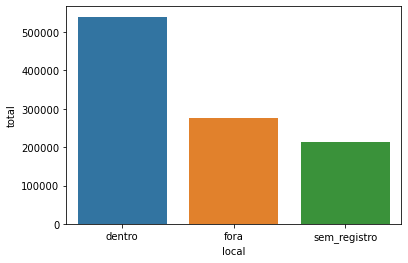

In [194]:
sns.barplot(x = 'local' , y = 'total' , data = dados_local_da_ocorrencia_df)

### Duração media de cada tipo de ofensa

In [211]:
nivel_de_ofensa.head()

,data_da_ocorrencia,data_final_da_ocorrencia,data_comunicacao_policia,hora_da_ocorrencia,hora_termino_da_ocorrencia,duracao_da_ocorrencia,descricao_da_ofensa,conclusao,nivel_de_ofensa,jurisdicao,bairro,local_da_ocorrencia,descricao_das_intalacoes
0,2015-12-31,NaT,2015-12-31,23:45:00,NaN,NaT,FORGERY,concluido,crime,N.Y. POLICE DEPT,BRONX,dentro,BAR/NIGHT CLUB
1,2015-12-31,NaT,2015-12-31,23:36:00,NaN,NaT,MURDER & NON-NEGL. MANSLAUGHTER,concluido,crime,N.Y. POLICE DEPT,QUEENS,fora,NaN
2,2015-12-31,NaT,2015-12-31,23:30:00,NaN,NaT,DANGEROUS DRUGS,concluido,crime,N.Y. POLICE DEPT,MANHATTAN,NaN,OTHER
3,2015-12-31,NaT,2015-12-31,23:30:00,NaN,NaT,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,QUEENS,dentro,RESIDENCE-HOUSE
4,2015-12-31,2015-12-31,2015-12-31,23:25:00,23:30:00,00:05:00,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,MANHATTAN,em_frente,OTHER


In [213]:
duracao_crimes = nivel_de_ofensa.query(' nivel_de_ofensa == "crime"')
duracao_crimes = duracao_crimes.duracao_da_ocorrencia.mean()
duracao_crimes

Timedelta('0 days 00:06:54.867443')

In [214]:
duracao_contravencao = nivel_de_ofensa.query('nivel_de_ofensa == "contravencao"')
duracao_contravencao =  duracao_contravencao.duracao_da_ocorrencia.mean()
duracao_contravencao

Timedelta('-1 days +23:53:52.873507')

In [215]:
duracao_violacao = nivel_de_ofensa.query('nivel_de_ofensa == "violacao"')
duracao_violacao =  duracao_violacao.duracao_da_ocorrencia.mean()
duracao_violacao

Timedelta('0 days 00:15:02.842302')

## Comparando as ocorrencias de contravenção em cada bairro

In [216]:
# gerando as variaveis contravenção de cada bairro

# BROOKLYN
contravencao_brooklyn = sum(brooklyn_df.query('ofensa == "contravencao"').quantidade)
contravencao_brooklyn

# MANHATTAN
contravencao_manhattan = sum(manhattan_df.query('ofensa == "contravencao"').quantidade)
contravencao_manhattan

# BRONX
contravencao_bronx = sum(bronx_df.query('ofensa == "contravencao"').quantidade)
contravencao_bronx

# queens
contravencao_queens = sum(queens_df.query('ofensa == "contravencao"').quantidade)
contravencao_queens


# staten_island
contravencao_staten_island = sum(staten_island_df.query('ofensa == "contravencao"').quantidade)
contravencao_staten_island



contravencao_por_bairros = {
    'bairro' : ['brooklyn', 'manhattan', 'bronx', 'queens', 'staten_island'],
    'total_contravencao' : [contravencao_brooklyn, contravencao_manhattan, contravencao_bronx, contravencao_queens, contravencao_staten_island ]

}

contravencao_por_bairros_df = pd.DataFrame(contravencao_por_bairros)

In [218]:
contravencao_por_bairros_df

,bairro,total_contravencao
0,brooklyn,166048
1,manhattan,139701
2,bronx,134965
3,queens,111774
4,staten_island,27793


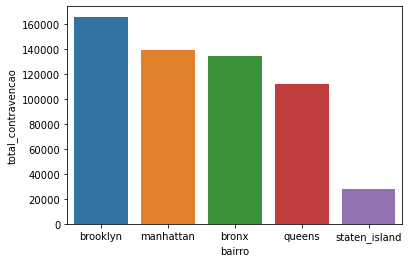

In [219]:
sns.barplot(x = 'bairro' , y = 'total_contravencao' , data = contravencao_por_bairros_df)

## Comparando as ocorrencias de crimes em cada bairro

In [ ]:
# comparar delitos (crime x contravenção x violaçao ) entre os  bairros 
# criar variaveis e por meio de um dicionario criar um dataFrame e visualizar as comparaçoes

In [221]:
# gerando as variaveis crimes de cada bairro

# BROOKLYN
crimes_brooklyn = sum(brooklyn_df.query('ofensa == "crime"').quantidade)
crimes_brooklyn

# MANHATTAN
crimes_manhattan = sum(manhattan_df.query('ofensa == "crime"').quantidade)
crimes_manhattan

# BRONX
crimes_bronx = sum(bronx_df.query('ofensa == "crime"').quantidade)
crimes_bronx

# queens
crimes_queens = sum(queens_df.query('ofensa == "crime"').quantidade)
crimes_queens


# staten_island
crimes_staten_island = sum(staten_island_df.query('ofensa == "crime"').quantidade)
crimes_staten_island


crimes_por_bairros = {
    'bairro' : ['brooklyn', 'manhattan', 'bronx', 'queens', 'staten_island'],
    'total_crimes' : [crimes_brooklyn, crimes_manhattan, crimes_bronx, crimes_queens, crimes_staten_island ]

}

crimes_por_bairros_df = pd.DataFrame(crimes_por_bairros)

In [222]:
crimes_por_bairros_df

,bairro,total_crimes
0,brooklyn,101013
1,manhattan,73723
2,bronx,60656
3,queens,68331
4,staten_island,10856


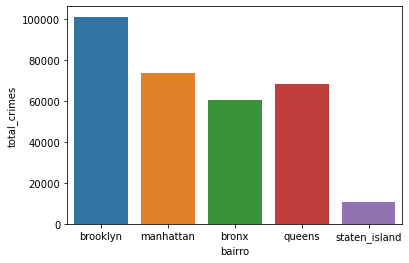

In [223]:
sns.barplot(x = 'bairro' , y = 'total_crimes' , data = crimes_por_bairros_df)

## Comparando as ocorrencias de violação em cada bairro

In [224]:
# gerando as variaveis violação de cada bairro

# BROOKLYN
violacao_brooklyn = sum(brooklyn_df.query('ofensa == "violacao"').quantidade)
violacao_brooklyn

# MANHATTAN
violacao_manhattan = sum(manhattan_df.query('ofensa == "violacao"').quantidade)
violacao_manhattan

# BRONX
violacao_bronx = sum(bronx_df.query('ofensa == "violacao"').quantidade)
violacao_bronx

# queens
violacao_queens = sum(queens_df.query('ofensa == "violacao"').quantidade)
violacao_queens


# staten_island
violacao_staten_island = sum(staten_island_df.query('ofensa == "violacao"').quantidade)
violacao_staten_island



violacao_por_bairros = {
    'bairro' : ['brooklyn', 'manhattan', 'bronx', 'queens', 'staten_island'],
    'total_violacao' : [violacao_brooklyn, violacao_manhattan, violacao_bronx, violacao_queens, violacao_staten_island ]

}

violacao_por_bairros_df = pd.DataFrame(violacao_por_bairros)

In [225]:
violacao_por_bairros_df

,bairro,total_violacao
0,brooklyn,42584
1,manhattan,26835
2,bronx,28212
3,queens,27910
4,staten_island,9415


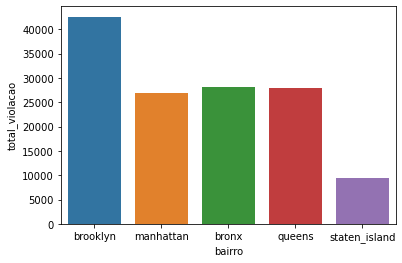

In [226]:
sns.barplot(x = 'bairro' , y = 'total_violacao' , data = violacao_por_bairros_df)